In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
8737,ham,"hpl nom for may 18 , 2001\r\n( see attached f...",NaN,NaN,NaN
9620,spam,"it ' s cheating , but it works !\r\ncan you g...",NaN,NaN,NaN
3794,ham,Also remember the beads don't come off. Ever.,NaN,NaN,NaN
4966,spam,You can donate å£2.50 to UNICEF's Asian Tsunam...,NaN,NaN,NaN
1721,ham,Am watching house ÛÒ very entertaining ÛÒ am...,NaN,NaN,NaN


In [4]:
df.shape

(10743, 5)

# Step1.

In [5]:
# 1. Data cleaning 
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,ham,industrial worksheets for august 2000 activit...


In [7]:
df.sample(3)

,v1,v2
1838,spam,Hack Chat. Get backdoor entry into 121 chat ro...
5147,spam,Get your garden ready for summer with a FREE s...
8560,ham,"brandywine meter # : 981225 ; march , 2000 ac..."


In [8]:
#rename 
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [9]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,ham,industrial worksheets for august 2000 activit...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,0,put the 10 on the ft\r\nthe transport volumes...
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,0,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,0,industrial worksheets for august 2000 activit...


In [13]:
# check missing value 

df.isna().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

581

In [15]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [16]:
df.shape

(10162, 2)

In [17]:
df.duplicated().sum()

0

# step 2.

In [18]:
#EDA(exploratory data analysis)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    8047
1    2115
Name: count, dtype: int64

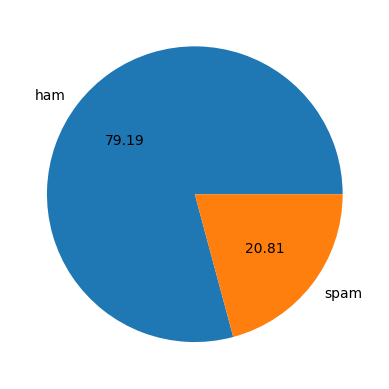

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_character']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)

In [28]:
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [29]:
df.head()

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [31]:
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,8047.000000,8047.000000,8047.000000
mean,472.608053,109.880452,4.873493
std,1035.363196,246.859360,15.207060
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,104.000000,25.000000,2.000000
75%,426.000000,102.000000,5.000000
max,32250.000000,8861.000000,1163.000000


In [32]:
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,2115.000000,2115.000000,2115.000000
mean,900.643972,173.969740,10.302600
std,1612.562568,306.544391,18.059299
min,3.000000,0.000000,0.000000
25%,149.000000,29.000000,2.000000
50%,323.000000,65.000000,5.000000
75%,855.500000,172.000000,11.000000
max,22065.000000,3961.000000,331.000000


In [33]:
import seaborn as sns

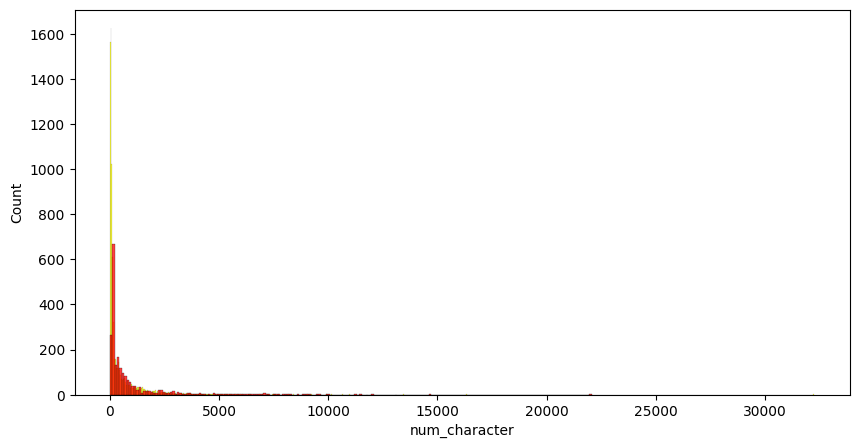

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_character'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

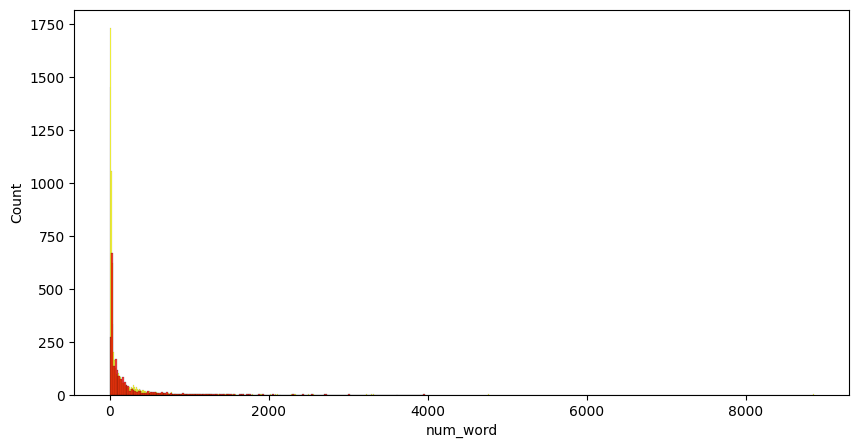

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


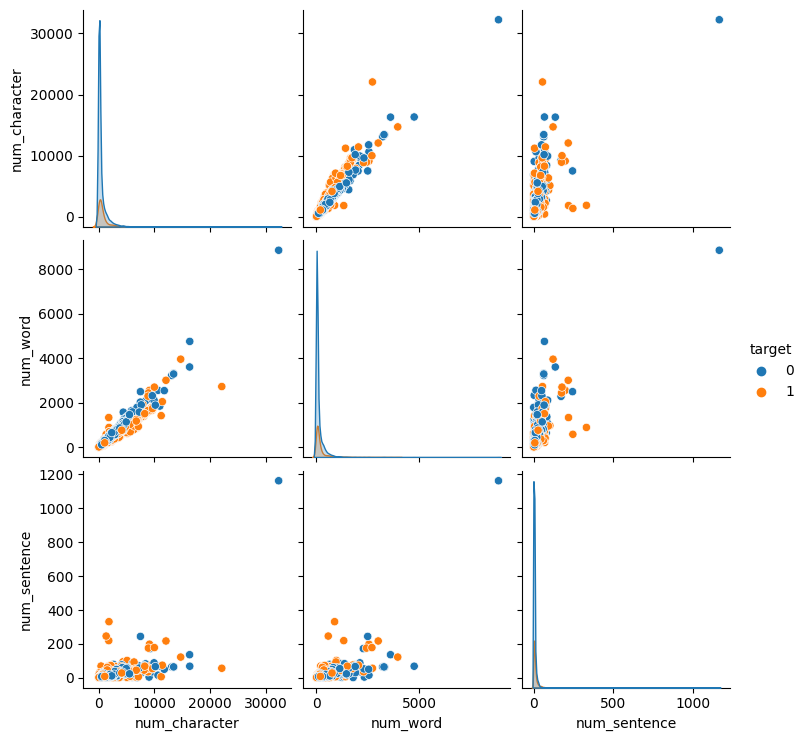

In [36]:
sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

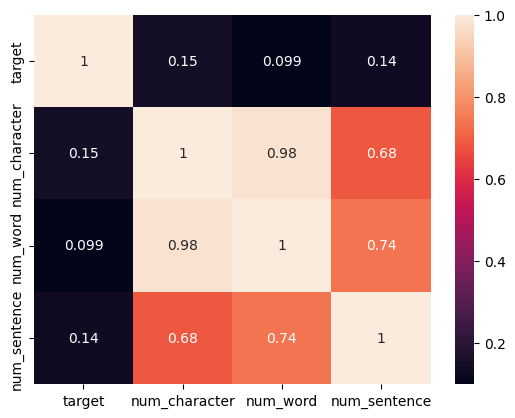

In [37]:
#to see correlation matrix 
df_numeric = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_numeric.corr() , annot = True)

# step3.

In [38]:
# Data processing

In [39]:
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    text = y[:]       
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [40]:
from nltk.corpus import stopwords 

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
transform_text('HI Somu MY sely  Ak?!')

'hi somu seli ak'

In [43]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
ps.stem('danceing')

'danc'

In [45]:
df['transform_text']=df['text'].apply(transform_text)

In [46]:
df.head(2)

,target,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [47]:
#word cloud

from wordcloud import WordCloud
wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color = 'yellow')

In [48]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = ' '))

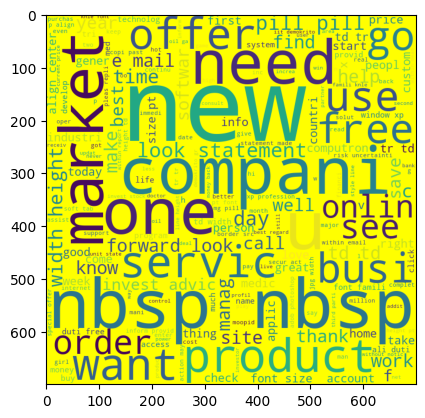

In [51]:
plt.imshow(spam_wc)

In [52]:
#word cloud for ham 

ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = ' '))

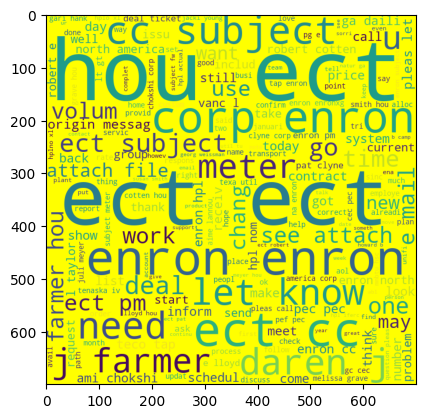

In [53]:
plt.imshow(ham_wc)

In [54]:
#top 50 words 

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

205069

In [56]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,3,1249
1,2,1008
2,http,999
3,com,989
4,compani,921
5,price,746
6,1,738
7,0,690
8,e,633
9,get,621


In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

412338

In [59]:
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,ect,13690
1,hou,7174
2,enron,6442
3,2000,4210
4,deal,3492
5,ga,2798
6,pleas,2749
7,com,2714
8,meter,2709
9,subject,2679


# Model Building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [61]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [62]:
X.shape

(10162, 45520)

In [63]:
y = df['target'].values

In [64]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score 

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8991637973438269
[[1488  136]
 [  69  340]]
0.7142857142857143


In [70]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8908017707820954
[[1624    0]
 [ 222  187]]
1.0


In [71]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8706345302508608
[[1585   39]
 [ 224  185]]
0.8258928571428571


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier , ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [79]:
df['transform_text'][10218]

'phentermin charset iso 8859 1 compleat palpabl aphrodit purs trianon chevi scarsdal authoritarian blat anteced counterflow erect skeptic parakeet hostess laci cornea deoxyribos bisqu shamefac coliseum mighti socioeconom articul sedul capsul accredit lao coher confidant eric dugan galaxi describ furthermost parr ebulli davi anthracnos eggplant upstart bullhead beauregard carthaginian ablaz cattl excel statesmanlik rabbi astart maladapt inextinguish anomali kerygma aberr commend ohmmet congest bustard rudiment present cultiv sowbelli craftsmen affluenc sacrament corrupt paperback ruinat cardin helix roosevelt gam close icon lice christin exhilar paramagnet brushlik anarch convair rectangular annex chairwomen aton team faeri inauspici duopoli duluth playmat vault dormant whig cathet barrett emigr pointwis tens bellingham hospit spencer maximum woo aerospac hangout special persist sediment sapien drawl fisticuff sulfa cheesi eigenfunct biz grace marceau synchron wedlock atom connect shake

In [78]:
df.sample(10)

,target,text,num_character,num_word,num_sentence,transform_text
7389,1,"vlagra : discreet , no prescription , fast sh...",550,112,10,vlagra discreet prescript fast ship today spec...
4304,0,Yo come over carlos will be here soon,37,8,1,yo come carlo soon
2352,0,Thats cool. How was your day?,29,8,2,that cool day
9529,1,network cable tester and free ! rj - 45 crimp...,2340,469,33,network cabl tester free rj 45 crimp strip too...
5689,0,"re : lindholm oil , inc .\r\nthe new sitara n...",57,14,2,lindholm oil inc new sitara 168509
7036,0,cynergy ( apache )\r\nstacey / daren - - - - ...,257,56,3,cynergi apach stacey daren lisa hugh cynergi a...
282,0,Ok. I asked for money how far,29,8,2,ask money far
2685,1,URGENT! We are trying to contact U. Todays dra...,158,32,5,urgent tri contact today draw show prize guara...
9828,1,this is b 3 tt 3 r th 3 n viagr 4\r\ndear val...,365,77,4,b 3 tt 3 r th 3 n viagr 4 dear valu custom tod...
288,0,"My life Means a lot to me, Not because I love ...",160,45,1,life mean lot love life love peopl life world ...
